# THUẬT TOÁN LOUVAN
Thuật toán Louvain
1. Tổng quan: Thuật toán Louvain là một thuật toán đồ thị được sử dụng để phân cụm đồ thị được sửdụng để phân chia các đỉnh của đồ thị thành các cụm (clusters) dựa trên các liên kết giữa chúng.Thuật toán Louvain được phát triển bởi ba nhà khoa học Vincent Blondel, Jean-Loup Guillaume và Renaud Lambiotte vào năm 2008 tại Đại học Louvain (Université catholique de Louvain) ở Louvain-la-Neuve, Bỉ. Và tên gọi "Louvain" của thuật toán được lấy theo tên trường đại học mà các tác giả đang làm việc tại thời điểm phát triển thuật toán.Thuật toán Louvain có độ phức tạp thời gian trung bình là O(nlog(n)), trong đó n là số lượng đỉnh trong đồ thị.
2. Mục tiêu: Mục tiêu của thuật toán Louvain là tối ưu hóa độ modular (modularity) của phân cụm, tức là tối đa hóa mối liên kết giữa các đỉnh trong cùng một cụm và tối thiểu hóa mối liên kết giữa các cụm khác nhau.
3. Hoạt động: Thuật toán Louvain hoạt động bằng cách lần lượt thực hiện hai giai đoạn: phân cụm và tái phân cụm. Trong giai đoạn phân cụm, thuật toán tìm cách phân chia các đỉnh của đồ thị thành các cụm sao cho mỗi cụm có mối liên kết mạnh với nhau bên trong cụm và mối liên kết yếu với các đỉnh bên ngoài cụm. Cụ thể, thuật toán sử dụng một hàm modular để đo lường mức độ phân cụm và tối ưu hóa nó bằng cách thực hiện một số lần lặp. Trong giai đoạn tái phân cụm, thuật toán sử dụng các cụm được tạo ra trong giai đoạn phân cụmnhư là các đỉnh mới và tiếp tục phân chia chúng.

# TỔNG QUAN CÁC CHỈ SỐ ĐÁNH GIÁ VIỆC PHÁT HIỆN CỘNG ĐỒNG
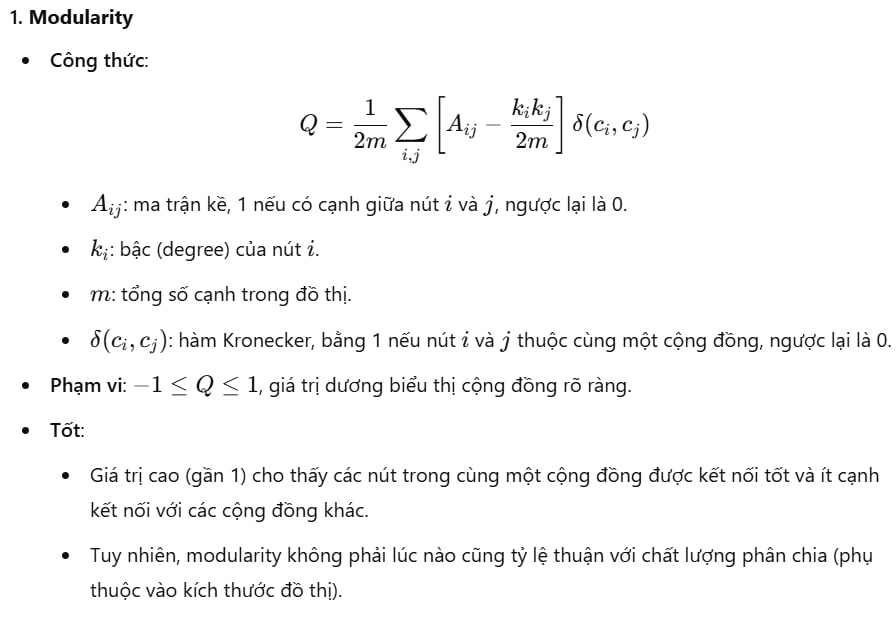

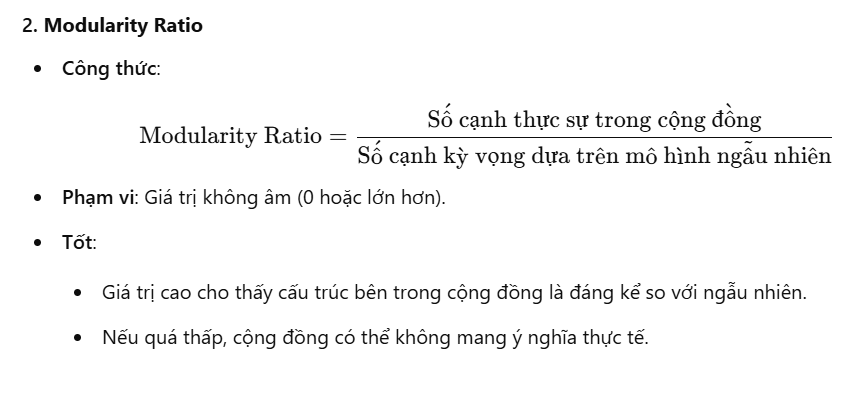

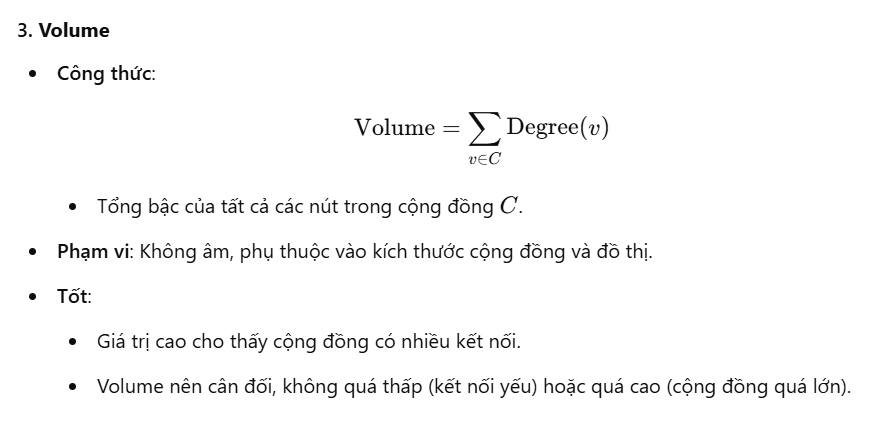

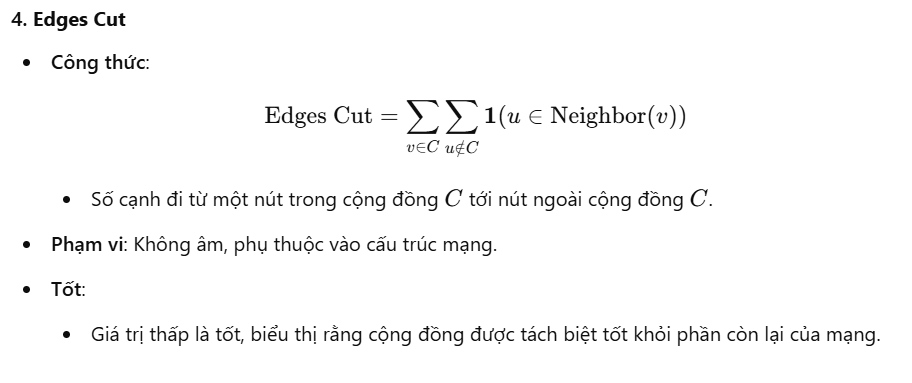

**PHÂN TÍCH VÀ SỬ DỤNG:**

Modularity: Chỉ số chính, thường được dùng để so sánh các phân chia cộng đồng khác nhau. Tuy nhiên, nó có thể thiên vị các cộng đồng lớn.

Modularity Ratio: Bổ sung thông tin chi tiết về chất lượng các cộng đồng nhỏ hơn.

Volume: Dùng để đánh giá kích thước và sự gắn kết của từng cộng đồng.

Edges Cut: Dùng để đánh giá mức độ cô lập của cộng đồng, nên kết hợp với Volume để cân đối.

Mục tiêu:
Cộng đồng lý tưởng có modularity và modularity ratio cao, edges cut thấp, và volume không quá lớn hoặc quá nhỏ.

Network Info: 77 nodes, 254 edges

Community Detection Metrics Summary:
    modularity  modularity_ratio   volume  edges_cut
k                                                   
1        0.074             5.062  254.000      3.000
2        0.269             4.435  169.333      8.667
3        0.271            17.438  127.000      7.000
4        0.350            14.362  101.600     13.600
5        0.385            12.557   84.667     15.333
6        0.378            13.732   72.571     13.714
7        0.377            12.016   63.500     12.250
8        0.376            10.680   56.444     11.111
9        0.378            12.788   50.800     10.400
10       0.478            11.814   46.182     11.818
11       0.477            10.827   42.333     11.000
12       0.476             9.992   39.077     10.308
13       0.475             9.277   36.286      9.714
14       0.474             8.656   33.867      9.200
15       0.473             8.118   31.750      8.750
16       0.472             

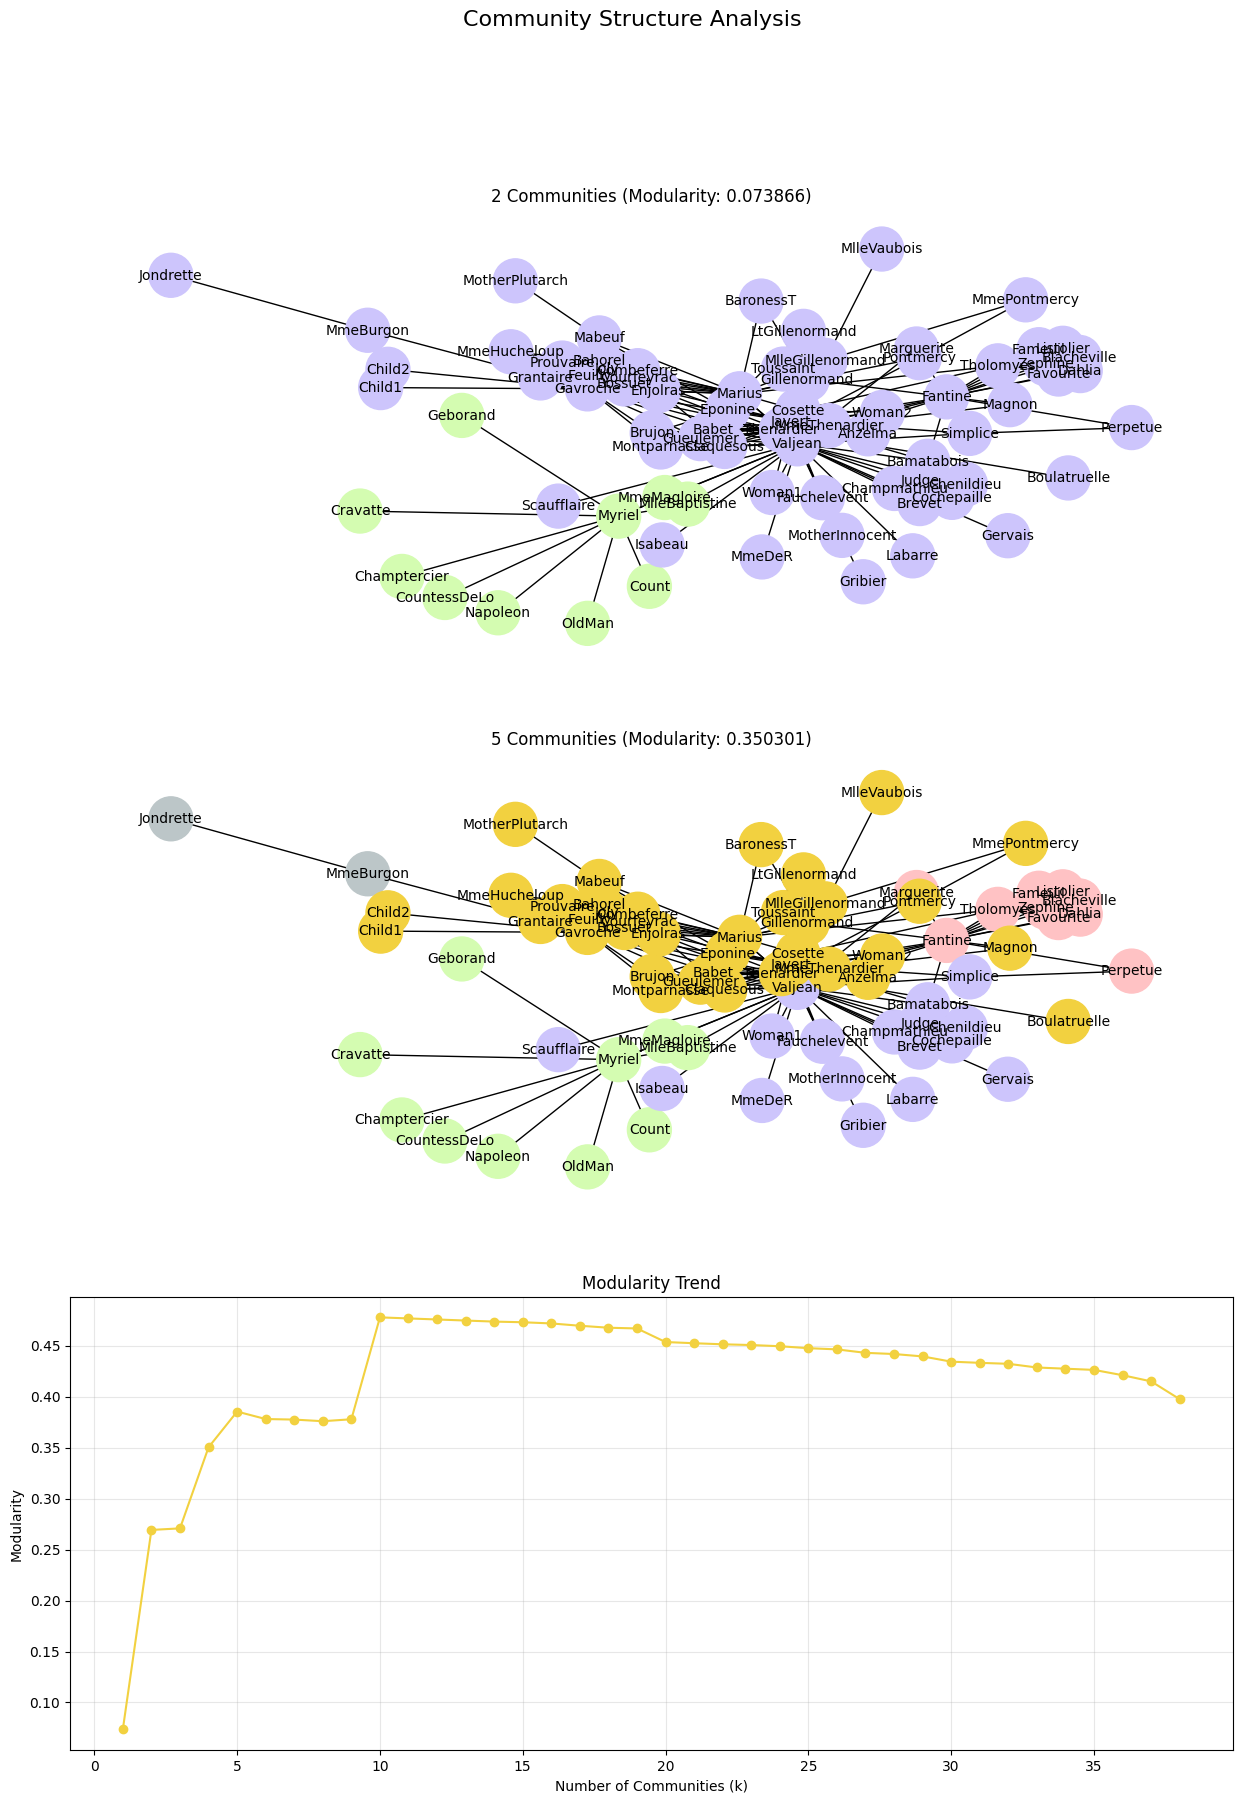

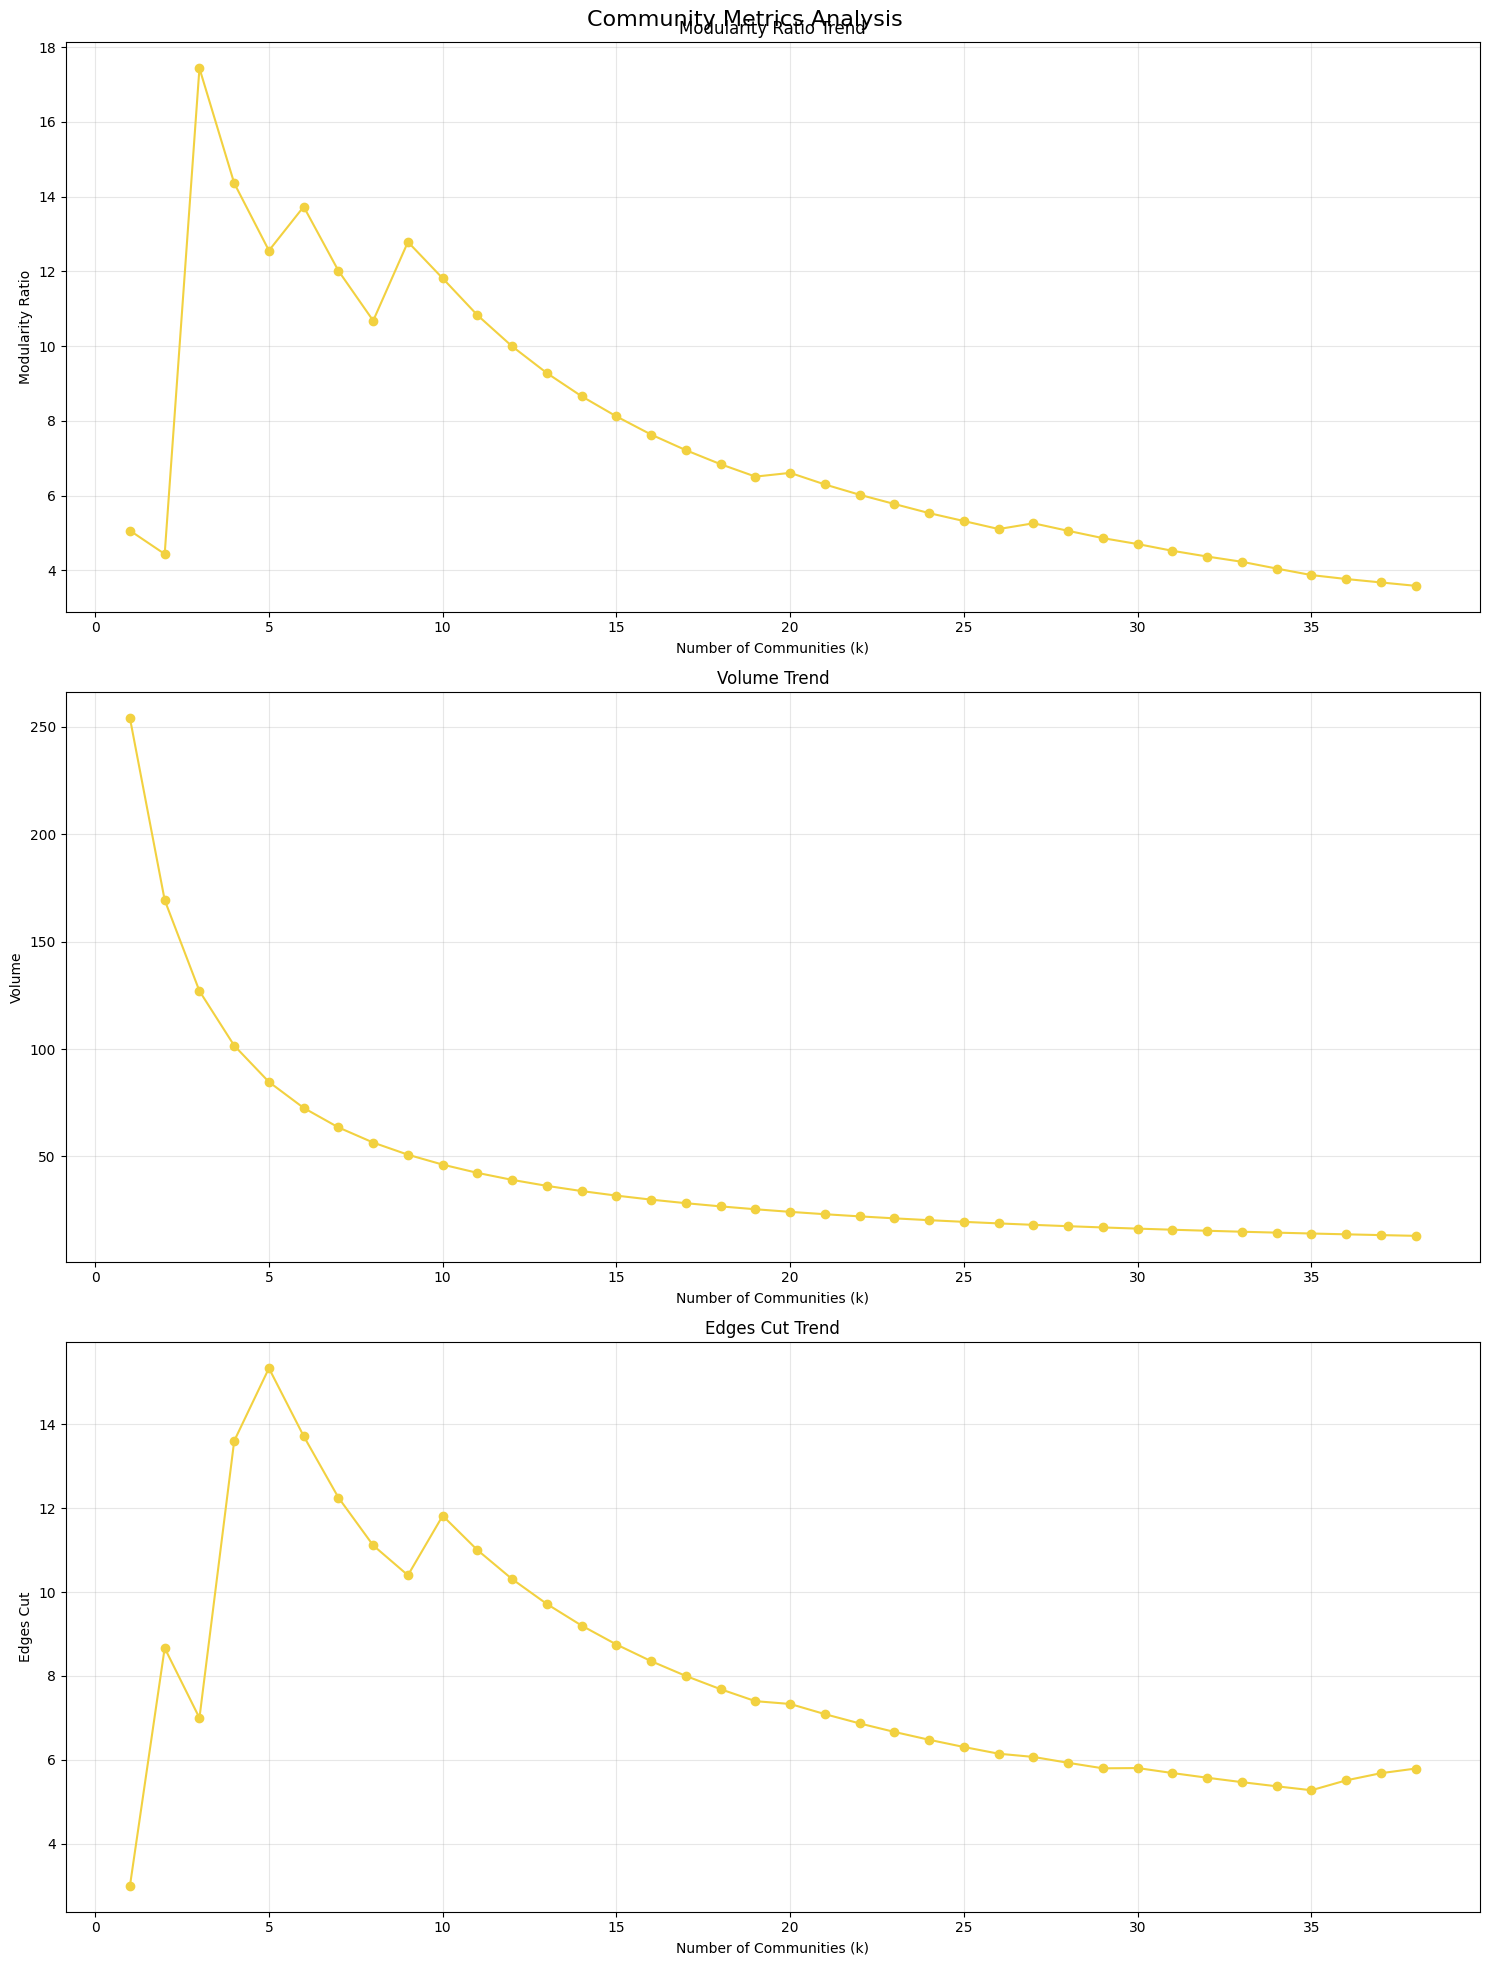

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

class CommunityAnalyzer:
    def __init__(self, G):
        self.G = G
        self.communities = list(nx.community.girvan_newman(G))

    def modularity_ratio(self, G, community):
        """Calculate modularity ratio for a community"""
        community = list(community)
        edges_between_community = 0
        for node in community:
            neighbors = set(G.neighbors(node))
            edges_between_community += sum(1 for n in neighbors if n in community)
        edges_between_community //= 2
        expected_edges = sum(G.degree(node) for node in community) ** 2 / (2 * G.size())
        return edges_between_community / expected_edges if expected_edges != 0 else 0

    def volume(self, G, community):
        """Calculate volume of a community"""
        return sum(G.degree(node) for node in list(community))

    def edges_cut(self, G, community):
        """Calculate number of edges cut for a community"""
        community = list(community)
        return sum(1 for node in community
                   for neighbor in G.neighbors(node)
                   if neighbor not in community)

    def analyze_communities(self):
        """Analyze communities and calculate metrics"""
        metrics_data = []
        for k in range(len(self.communities) // 2):
            for community in self.communities[k]:
                metrics_data.append({
                    'k': k + 1,
                    'modularity': nx.community.modularity(self.G, self.communities[k]),
                    'modularity_ratio': self.modularity_ratio(self.G, community),
                    'volume': self.volume(self.G, community),
                    'edges_cut': self.edges_cut(self.G, community)
                })
        return pd.DataFrame(metrics_data)

    def plot_metrics(self, metrics_df):
        """Create visualizations for metrics and communities"""
        print(metrics_df)
        # First figure: Community visualizations and modularity
        fig1, axes1 = plt.subplots(3, 1, figsize=(15, 20))
        fig1.suptitle('Community Structure Analysis', fontsize=16)

        # Plot communities
        for idx, k in enumerate([0, 3]):
            communities = self.communities[k]
            modularity = round(nx.community.modularity(self.G, communities), 6)
            pos = nx.spring_layout(self.G, k=0.3, iterations=50, seed=2)

            axes1[idx].set_title(f"{len(communities)} Communities (Modularity: {modularity})")
            colors = ["#D4FCB1", "#CDC5FC", "#FFC2C4", "#F2D140", "#BCC6C8"]
            node_colors = [
                colors[list(map(lambda c: node in c, communities)).index(True) % len(colors)]
                for node in self.G.nodes()
            ]

            nx.draw(self.G, pos=pos, node_color=node_colors, node_size=1000,
                    with_labels=True, font_size=10, font_color="black", ax=axes1[idx])

        # Plot modularity trend
        metrics_df.groupby('k')['modularity'].first().plot(
            ax=axes1[2], color="#F2D140", marker='o',
            title="Modularity Trend")
        axes1[2].set_xlabel("Number of Communities (k)")
        axes1[2].set_ylabel("Modularity")
        axes1[2].grid(True, alpha=0.3)

        # Second figure: Other metrics
        fig2, axes2 = plt.subplots(3, 1, figsize=(15, 20))
        fig2.suptitle('Community Metrics Analysis', fontsize=16)

        metrics = {
            'modularity_ratio': 'Modularity Ratio',
            'volume': 'Volume',
            'edges_cut': 'Edges Cut'
        }

        for idx, (metric, title) in enumerate(metrics.items()):
            metrics_df.groupby('k')[metric].mean().plot(
                ax=axes2[idx], color="#F2D140", marker='o',
                title=f"{title} Trend")
            axes2[idx].set_xlabel("Number of Communities (k)")
            axes2[idx].set_ylabel(title)
            axes2[idx].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        return fig1, fig2

def main():
    # Create and analyze karate club network
    G = nx.les_miserables_graph()
    print(f"Network Info: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")

    # Initialize analyzer and calculate metrics
    analyzer = CommunityAnalyzer(G)
    metrics_df = analyzer.analyze_communities()

    # Display metrics
    print("\nCommunity Detection Metrics Summary:")
    summary = metrics_df.groupby('k').agg({
        'modularity': 'first',
        'modularity_ratio': 'mean',
        'volume': 'mean',
        'edges_cut': 'mean'
    }).round(3)
    print(summary)

    # Create visualizations
    analyzer.plot_metrics(metrics_df)

if __name__ == "__main__":
    main()


Dựa trên các chỉ số thu được từ phân tích:

**Modularity:**

Ban đầu, đồ thị với một cộng đồng lớn có modularity thấp.
Khi chia đồ thị thành các cộng đồng nhỏ, modularity tăng lên và đạt cực đại ở một mức cụ thể k=10, sau đó giảm dần khi các cộng đồng bị chia quá nhỏ.

Nhận xét: Số lượng cộng đồng tối ưu là khi modularity đạt cực đại (thường trong khoảng 3-5 cộng đồng).

**Modularity Ratio:**

Giá trị modularity ratio cao ở các cộng đồng rõ ràng (ví dụ: các nhân vật có mối quan hệ mật thiết).

Giá trị này giảm khi cộng đồng bị chia nhỏ quá mức hoặc khi các nút trong cộng đồng có ít kết nối với nhau (kể từ k=10)

**Volume:**

Các cộng đồng có volume cân đối (không quá nhỏ hoặc quá lớn 100 đến 250) là dấu hiệu tốt, biểu thị các nhân vật trong cộng đồng tương tác mạnh mẽ.

Nhận xét: Volume quá thấp biểu thị cộng đồng bị chia nhỏ hoặc thiếu kết nối nội bộ (kể từ k=5, volume nhỏ hơn 100)

**Edges Cut:**

Giá trị edges cut thấp ở các mức chia hợp lý, biểu thị rằng các cộng đồng được cô lập tốt khỏi phần còn lại của đồ thị.

Giá trị edges cut cao khi các cộng đồng chứa nhiều cạnh nối với các cộng đồng khác, biểu thị sự giao thoa lớn giữa các cộng đồng.